In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """
    Generate a synthetic dataset for linear regression: y = Xw + b + noise

    Parameters:
    - w: Tensor of shape (d,), the true weights
    - b: Scalar, the true bias
    - num_examples: Number of data points to generate

    Returns:
    - features: Tensor of shape (num_examples, d)
    - labels: Tensor of shape (num_examples, 1)
    """
    # Generate input features from a standard normal distribution
    X = torch.normal(mean=0.0, std=1.0, size=(num_examples, len(w)))

    # Compute labels using the linear function y = Xw + b
    y = torch.matmul(X, w) + b

    # Add small Gaussian noise to simulate real-world measurement error
    y += torch.normal(0.0, 0.01, size=y.shape)

    # Reshape y to a column vector for compatibility with model output
    return X, y.reshape(-1, 1)


true_w = torch.tensor([2.0, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features: tensor([-1.2565,  0.1853]) 
label: tensor([1.0608])


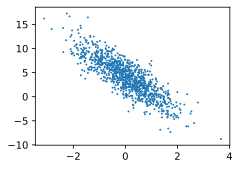

In [6]:
print('features:',features[0],'\nlabel:',labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), 
                labels.detach().numpy(),1)

In [7]:
def data_iter(batch_size, features, labels):
    """
    Randomly sample mini-batches of the given features and labels.

    Args:
        batch_size (int): Number of samples per mini-batch.
        features (Tensor): The input features (shape: [num_samples, num_features]).
        labels (Tensor): The corresponding labels (shape: [num_samples, 1]).

    Yields:
        (Tensor, Tensor): A tuple containing a mini-batch of (features, labels).
    """
    num_examples = len(features)  # Total number of data samples
    indices = list(range(num_examples))  # Create a list of indices: [0, 1, 2, ..., num_examples-1]

    # Shuffle the indices so we read data in random order
    random.shuffle(indices)

    # Loop through the shuffled indices in steps of `batch_size`
    for i in range(0, num_examples, batch_size):
        # Get the indices for the current batch
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])

        # Use the batch indices to fetch the corresponding features and labels
        yield features[batch_indices], labels[batch_indices]

In [64]:
batch_size = 10

# Iterate through the batches and print the first one
for X, y in data_iter(batch_size, features, labels):
    print("Feature batch:\n", X)
    print("\nLabel batch:\n", y)
    break  # Only show the first batch

Feature batch:
 tensor([[-2.1856e-01,  1.4432e+00],
        [ 6.3990e-01, -1.0151e-01],
        [ 1.0614e+00,  2.2384e-01],
        [ 9.7660e-01,  4.7555e-01],
        [ 1.3798e-01, -5.6775e-01],
        [-5.5533e-01,  4.9615e-04],
        [ 4.1408e-02,  5.8848e-01],
        [ 2.8265e+00,  9.9451e-01],
        [ 5.8816e-01, -4.3612e-01],
        [-3.8365e-02, -9.6670e-01]])

Label batch:
 tensor([[-1.1513],
        [ 5.8160],
        [ 5.5513],
        [ 4.5358],
        [ 6.4019],
        [ 3.1001],
        [ 2.2753],
        [ 6.4720],
        [ 6.8734],
        [ 7.4307]])
